Problem Statement - We have given the chemical analysis of the wine we have to do classification based on the region.

In [ ]:
# importing the library dataset
from sklearn.datasets import load_wine

Loading the wine dataset and initially the wine dataset is in the form of dictationary

In [ ]:
wine = load_wine()

Printing how feature names and how many features present in the dataset

In [ ]:
print(wine.feature_names)
print()
print(len(wine.feature_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

13


Importing the Libraries which are required for the preprocessing, visualising and for making model

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.stats import skewnorm, norm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

Converting the dataset into dataframe format because it is present in dictionary format

In [ ]:
data = pd.DataFrame(wine.data, columns = wine.feature_names)

Adding the target column to the dataset, initially target variable is not present

In [ ]:
data['region'] = wine.target

Printing the dataset

In [ ]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,region
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Checking the infomation of the dataset, checking null values present or not, and the datatype of each column. All the 14 columns are numerical but initially region column is categorial but it has been label encoded and converted to integer.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  regio

Describe Method gives the overall statistics of the dataset. If the DataFrame contains numerical data, the description contains these information for each column: count, mean, standard deviation, minimum value, 25 percentile, 50 percentile, 75 percentile and Maximum value.

In [ ]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,region
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Checking how many regions are there and the count of each region.

In [ ]:
data['region'].value_counts()

1    71
0    59
2    48
Name: region, dtype: int64

Here I am showing the distplot for each column to see whether it is normally distributed or not, and also showing how normal distribution would look like and creating a boxplot to check if outliers are present or not on each column

<ipython-input-99-0bfb54b20ef2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], fit=norm)
<ipython-input-99-0bfb54b20ef2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], fit=norm)
<ipython-input-99-0bfb54b20ef2>:6: UserWarning: 

`distplot` is a deprecated function and wi

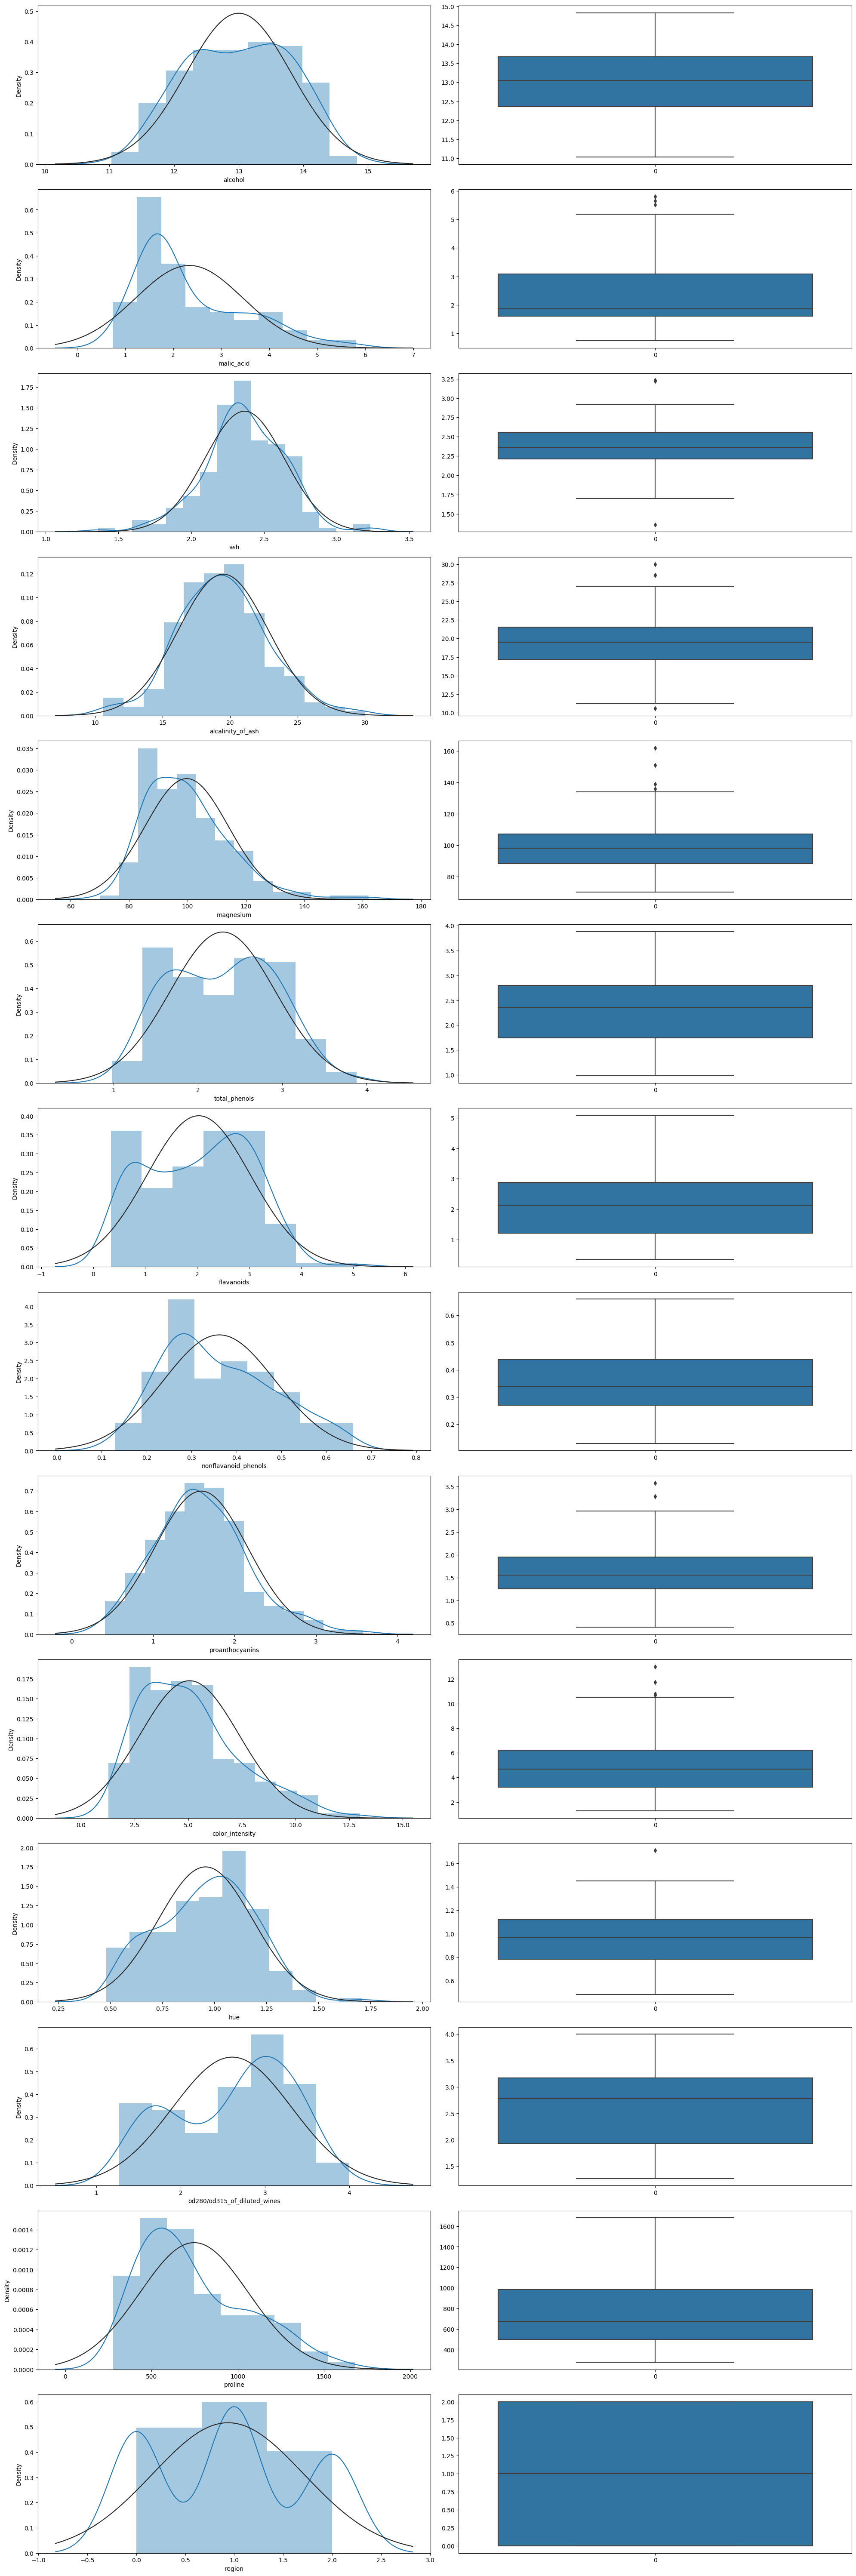

In [ ]:
plt.figure(figsize=[20,60])
columns = data.columns
cnt = 1
for col in columns:
    plt.subplot(14, 2, cnt)
    sns.distplot(data[col], fit=norm)
    cnt += 1
    plt.subplot(14, 2, cnt)
    sns.boxplot(data[col])
    cnt += 1
plt.tight_layout()
plt.show()

*   Three feature are normally distributed others are skewed
*   6 features contains few outliers (malic_acid, ash, alcalinity_of_ash, magnesium, proanthocyanins, color_intensity)




Handling Outliers

In [ ]:
out_col = data.loc[:, ['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'proanthocyanins', 'color_intensity']]

In [ ]:
def outlier_thresholds(data, variable):
    quartile1 = data[variable].quantile(0.25)
    quartile3 = data[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


for col in out_col:
    low_limit, up_limit = outlier_thresholds(data, col)
    data.loc[(data[col] < low_limit), col] = data[col].mean()-data[col].std()
    data.loc[(data[col] > up_limit), col] = data[col].mean()+data[col].std()

Now checking if outliers are handlded or not

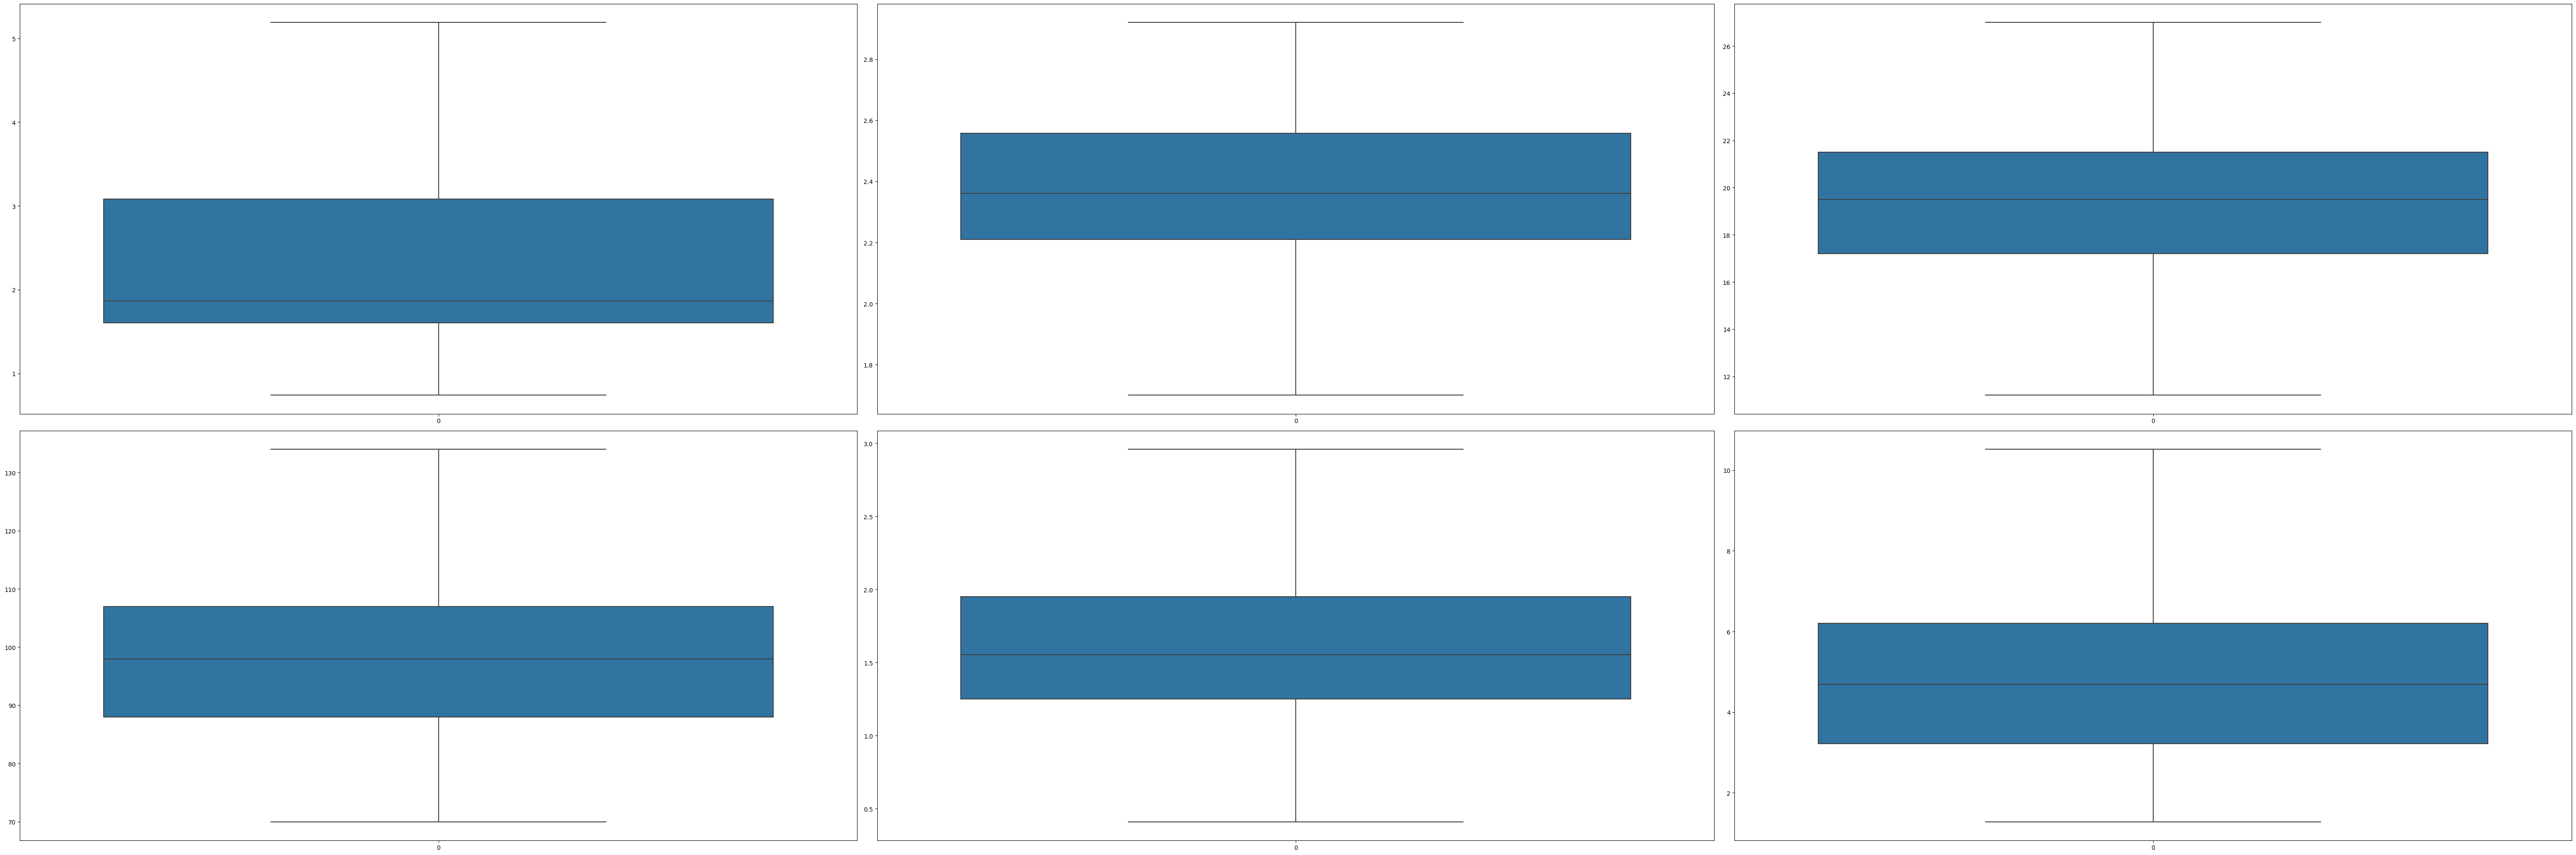

In [ ]:
plt.figure(figsize=[60, 20])
cnt = 1
for col in out_col:
    plt.subplot(2, 3, cnt)
    sns.boxplot(data[col])
    cnt += 1
plt.tight_layout()
plt.show()

Making Correlation to check whether are correlated or not

<Axes: >

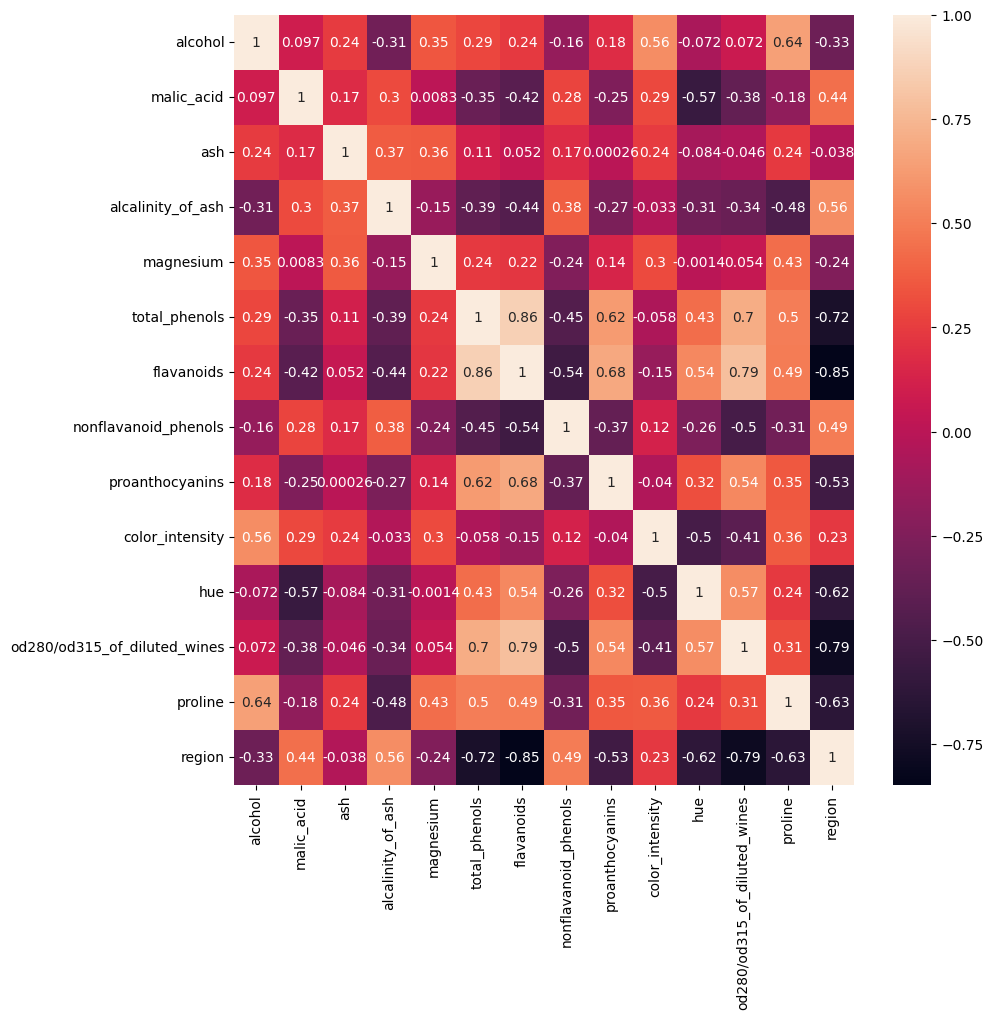

In [ ]:
plt.figure(figsize=[10,10])
df = data.corr()
sns.heatmap(df, annot=True)

# Splitting the Train test

Selecting the independent feature and dependent feature

In [ ]:
X = data.drop(['alcohol', 'malic_acid', 'magnesium', 'color_intensity', 'ash'], axis=1)
y = data.iloc[:, -1].values

checking the shape of the dataset

In [ ]:
X.shape, y.shape

((178, 9), (178,))

y is not in proper shape so doing reshaping it

In [ ]:
y = y.reshape(y.shape[0], 1)

#Standarize the data

Doing the scaling of independent feature so that all feaature comes in same scale or in same range.

In [ ]:
X = StandardScaler().fit_transform(X)

# Train the classifier

splitting the data into training and testing the splitting is done in the ratio of 80:20 where 80% of the dataset are taken in training while 20% for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size=0.2)

Randomly taking 5 neighbors and checking for the accuracy

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

Fitting the training dataset to model

In [ ]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Checking the model score

In [ ]:
knn.score(X_test, y_test)

0.9722222222222222

But this not might the best score there are chances that model score can increase

Checking the accuracy score, precision score, recall score, F1 score for the model

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy Score: %.3f"% accuracy_score(y_test, y_pred,))
print("Precision Score: %.3f"% precision_score(y_test, y_pred, average='micro'))
print("Recall Score: %.3f"% recall_score(y_test, y_pred, average='micro'))
print("F1 Score: %.3f"% f1_score(y_test, y_pred, average='micro'))

Accuracy Score: 0.972
Precision Score: 0.972
Recall Score: 0.972
F1 Score: 0.972


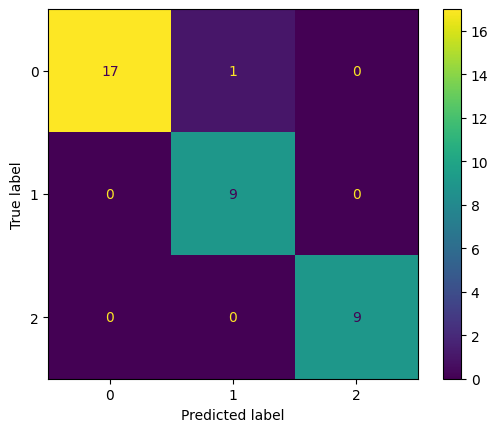

In [ ]:
cn = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix = cn)
cmd.plot()
plt.show()

# Performing PCA
Principal compund analysis - It is mainly used for Dimensionality Reduction and also for important feature selection.

When we use PCA - Whenever we need to know our features are independent of each other

In [ ]:
X = data.iloc[:, :-1].values
X = StandardScaler().fit_transform(X)

intially taking None components

In [ ]:
components = None

creating PCA object by passing None component

In [ ]:
pca = PCA(n_components=components)

while performing pca we have to scale our dataset

Here we are fitting the features in pca model

In [ ]:
pca.fit(X)

PCA()

Checking how much variance is explained by each feature

In [ ]:
print("Variance Explained (in percent) ")
print(pca.explained_variance_ratio_*100)

Variance Explained (in percent) 
[36.93656615 20.38417772 10.01542345  6.98864569  6.09464932  4.48898809
  3.83463384  2.87265205  2.32273476  2.00601957  1.84041019  1.4170215
  0.79807768]


Calculating the cumulative sum of the features

In [ ]:
print("Cumulative variance (in percent) ")
print(pca.explained_variance_ratio_.cumsum()*100)

Cumulative variance (in percent) 
[ 36.93656615  57.32074386  67.33616731  74.324813    80.41946231
  84.90845041  88.74308425  91.6157363   93.93847106  95.94449063
  97.78490082  99.20192232 100.        ]


In [ ]:
components = len(pca.explained_variance_ratio_*100)

creating the plot and by analyzing how much feature to be select for pca

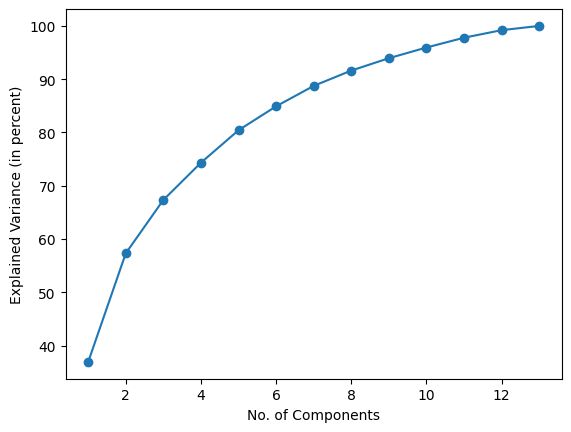

In [ ]:
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_*100), marker='o')
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance (in percent)')
plt.show()

So selecting how much principal component we need, otherwise it will take all the components

In [ ]:
pca = PCA(n_components=0.85)
pca.fit(X)
print("Cumulative variance (in percent) ")
print(pca.explained_variance_ratio_.cumsum()*100)
components = len(pca.explained_variance_ratio_.cumsum())

Cumulative variance (in percent) 
[36.93656615 57.32074386 67.33616731 74.324813   80.41946231 84.90845041
 88.74308425]


In [ ]:
x_pca = pca.transform(X)

In [ ]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, shuffle = True, random_state=1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9814814814814815

# Hyperparameter Tunning  
checking for the best value for k

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

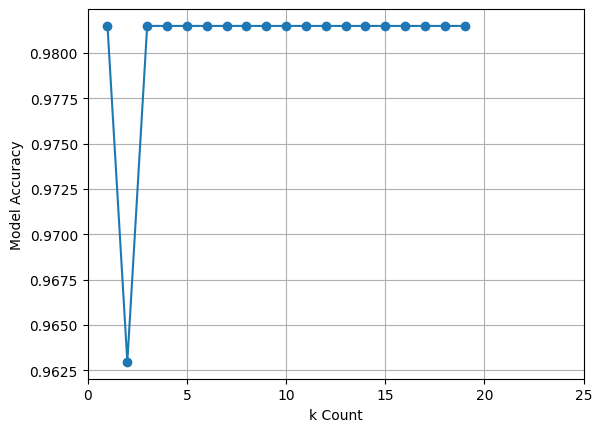

In [ ]:
k_range = range(1,20)
score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k Count')
plt.ylabel('Model Accuracy')
plt.plot(k_range, score, marker='o')
plt.grid()
plt.xticks([0, 5, 10, 15, 20, 25])
plt.show()

Here we can see that for all values of k the accuracy is same expext for k=2

In [ ]:
y_pred = knn.predict(X_test)

 A confusion matrix visualizes and summarizes the performance of a classification algorithm. How much data are correctly labelled

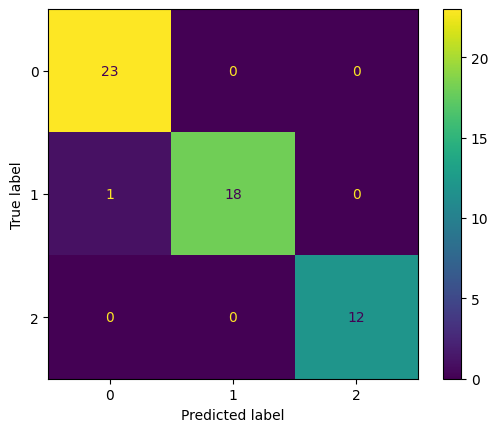

In [ ]:
cn = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix = cn)
cmd.plot()
plt.show()

In [ ]:
print("Accuracy Score: %.3f"% accuracy_score(y_test, y_pred,))
print("Precision Score: %.3f"% precision_score(y_test, y_pred, average='micro'))
print("Recall Score: %.3f"% recall_score(y_test, y_pred, average='micro'))
print("F1 Score: %.3f"% f1_score(y_test, y_pred, average='micro'))

Accuracy Score: 0.981
Precision Score: 0.981
Recall Score: 0.981
F1 Score: 0.981
